## Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline

## Loading Dataset

In [36]:
columns = ['question', 'answer']

df = pd.read_csv('dialogs.txt', sep='\t', names=columns)

# Now df will have columns named 'question' and 'answer'
df = df.iloc[:2000, :]
df.to_csv('dataset.csv')
df.head()


,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


## EDA

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
print("\nData types of columns:")
print(df.dtypes)
print("\nShape of the dataset:")
print(df.shape)
print("\nMissing values:")
print(df.isnull().sum())


Data types of columns:
question    object
answer      object
dtype: object

Shape of the dataset:
(2000, 2)

Missing values:
question    0
answer      0
dtype: int64


In [23]:
# Length distribution of questions and answers
df['question_length'] = df['question'].apply(len)
df['answer_length'] = df['answer'].apply(len)

## Visualization

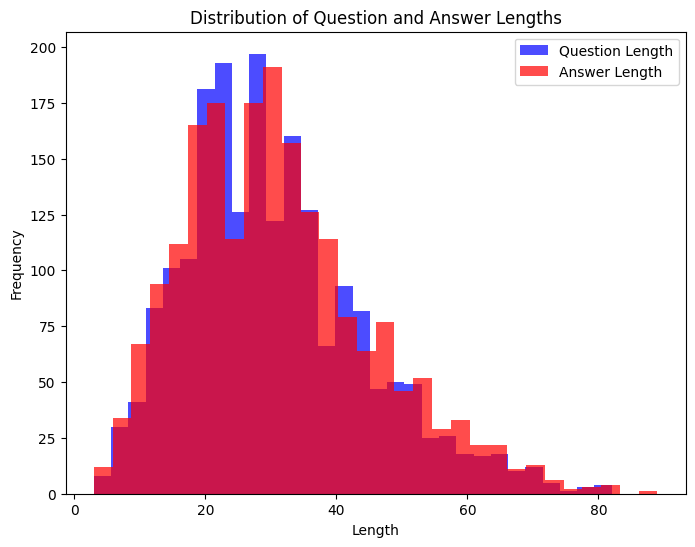

In [24]:
# Visualization
plt.figure(figsize=(8, 6))
plt.hist(df['question_length'], bins=30, alpha=0.7, color='blue', label='Question Length')
plt.hist(df['answer_length'], bins=30, alpha=0.7, color='red', label='Answer Length')
plt.title('Distribution of Question and Answer Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

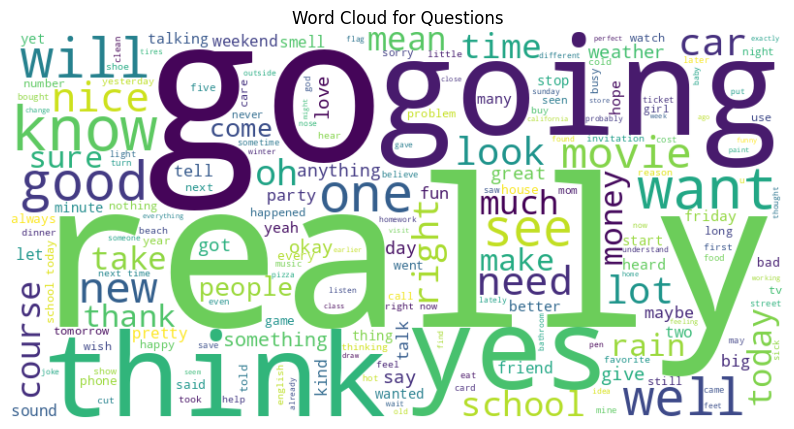

In [25]:
# Word Cloud
question_text = ' '.join(df['question'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(question_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Questions')
plt.axis('off')
plt.show()

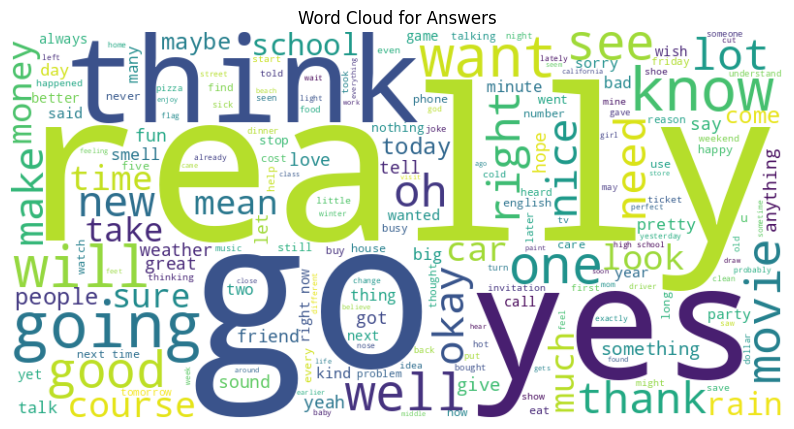

In [26]:
# Word cloud for answers
answer_text = ' '.join(df['answer'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(answer_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Answers')
plt.axis('off')
plt.show()

#### Importing Libraries

In [27]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

In [28]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['question'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
# Display the top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:", ", ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]))

Topic 0: think, doing, come, tell, didn, party, good, news, got, wanted
Topic 1: don, know, like, movie, want, good, money, going, mean, really
Topic 2: did, yes, sure, great, pretty, phone, school, maybe, thank, big
Topic 3: really, need, make, lot, course, new, weather, car, like, hope
Topic 4: ll, going, nice, time, right, ve, oh, today, school, really


#### Stats

In [29]:
df['question_word_count'] = df['question'].apply(lambda x: len(x.split()))
df['answer_word_count'] = df['answer'].apply(lambda x: len(x.split()))

# Analyze language complexity
avg_question_word_length = df['question'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split())).mean()
avg_answer_word_length = df['answer'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split())).mean()

print("\nAverage word length in questions:", avg_question_word_length)
print("Average word length in answers:", avg_answer_word_length)


Average word length in questions: 4.168738032106782
Average word length in answers: 4.169692321893793


### Preprocessing

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Function for preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
#     tokens = word_tokenize(text)
#     tokens = [word for word in tokens if word.isalnum()]
#     preprocessed_text = ' '.join(tokens)
    
    return text

# Apply preprocessing to question and answer columns
preprocessed_df = df.copy()
preprocessed_df['question'] = preprocessed_df['question'].apply(preprocess_text)
preprocessed_df['answer'] = preprocessed_df['answer'].apply(preprocess_text)

# Print the preprocessed DataFrame
preprocessed_df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,question,answer,question_length,answer_length,question_word_count,answer_word_count
0,"hi, how are you doing?",i'm fine. how about yourself?,22,29,5,5
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,29,35,5,6
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,35,33,6,7
3,no problem. so how have you been?,i've been great. what about you?,33,32,7,6
4,i've been great. what about you?,i've been good. i'm in school right now.,32,40,6,8
...,...,...,...,...,...,...
1995,people will tell you if they have a good hand.,how do they do that?,46,20,10,5
1996,how do they do that?,"for example, a friend of mine licks his lips.",20,45,5,9
1997,"for example, a friend of mine licks his lips.","when he licks his lips, you know he has a good...",45,52,9,12
1998,"when he licks his lips, you know he has a good...","i know he has a good hand, so i don't bet.",52,42,12,11


## Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df['question'], preprocessed_df['answer'], test_size=0.2, random_state=42, shuffle=True)

In [32]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Pipeline 4
# Pipe4 = Pipeline([
#    ("tfidf4", TfidfVectorizer()),
#    ('classifier4', DecisionTreeClassifier())
# ])

# Pipeline 5
Pipe5 = Pipeline([
    ("tfidf5", TfidfVectorizer()),
    ('classifier5', RandomForestClassifier())
])

# Training
# Pipe4.fit(X_train, y_train)
Pipe5.fit(X_train, y_train)

Pipeline(steps=[('tfidf5', TfidfVectorizer()),
                ('classifier5', RandomForestClassifier())])

In [33]:
import joblib

# Save the trained pipeline to a file
# joblib.dump(Pipe4, 'chatbot_pipeline4.pkl')
joblib.dump(Pipe5, 'chatbot_pipeline5.pkl')

['chatbot_pipeline5.pkl']

In [34]:
# print(Pipe4.predict(['where are you going'])[0])
print(Pipe5.predict(['where are you going'])[0])

i have to walk the dog.
i have to walk the dog.


In [35]:
predicted_text4 = Pipe4.predict(X_test)
predicted_text5 = Pipe5.predict(X_test)

# Creating a DataFrame to compare the first 10 results
comparison_df = pd.DataFrame({'Real Question ': X_test[:10],'Real Generated Text': y_test[:10],
                              'Random Forest': predicted_text5[:10]})
comparison_df.head(10)

,Real Question,Real Generated Text,Decision Tree,Random Forest
1860,"yes, he went through the red light.",can we call the police?,okay. i'll feed him right now.,"i couldn't help laughing, either."
353,what kind?,i like to listen to rock and r&b.,a ham sandwich.,a ham sandwich.
1333,"well, you'd better take it out front.",what time does the recycle truck come by?,thank you.,you shouldn't carry pens in your pocket.
905,why me?,because you helped make it dirty.,i just cut myself again.,i just cut myself again.
1289,why don't you look outside?,okay. it looks like rain.,"i'm not being nosey, it's just a question.",i meet too many jerks.
1273,i don't understand.,"for example, if your birth date is january 12,...","if you pour water into a glass, the water goes...","if you pour water into a glass, the water goes..."
938,i want to watch this tv show.,maybe you should record it.,"so then, why don't you just go?",what do you mean?
1731,the husband said he tried to help the boy.,"yes, he pushed him off the hood of the car.","i'll read it very loud, in case your hearing i...",i've been really busy.
65,"yes, it is.",it looks like it may rain soon.,i saw it twelve times.,"oh, yes, i really like it."
1323,how are you going to do that?,i'll just use the atm.,i'm joining the army.,i'm joining the army.
